# 波士顿房价预测任务

上一节我们初步认识了神经网络的基本概念（如神经元、多层连接、前向计算、计算图）和模型结构三要素（模型假设、评价函数和优化算法）。本节将以“波士顿房价预测”任务为例，向读者介绍使用Python语言和Numpy库来构建神经网络模型的思考过程和操作方法。

波士顿房价预测是一个经典的机器学习任务，类似于程序员世界的“Hello World”。和大家对房价的普遍认知相同，波士顿地区的房价受诸多因素影响。该数据集统计了13种可能影响房价的因素和该类型房屋的均价，期望构建一个基于13个因素进行房价预测的模型，如 **图1** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/abce0cb2a92f4e679c6855cfa520491597171533a0b0447e8d51d904446e213e" width="500" hegiht="" ></center>
<center><br>图1：波士顿房价影响因素示意图</br></center>
<br></br>

对于预测问题，可以根据预测输出的类型是连续的实数值，还是离散的标签，区分为回归任务和分类任务。因为房价是一个连续值，所以房价预测显然是一个回归任务。下面我们尝试用最简单的线性回归模型解决这个问题，并用神经网络来实现这个模型。

## 线性回归模型

假设房价和各影响因素之间能够用线性关系来描述：

$$y = {\sum_{j=1}^Mx_j w_j} + b$$

模型的求解即是通过数据拟合出每个$w_j$和$b$。其中，$w_j$和$b$分别表示该线性模型的权重和偏置。一维情况下，$w_j$ 和 $b$ 是直线的斜率和截距。

线性回归模型使用均方误差作为损失函数（Loss），用以衡量预测房价和真实房价的差异，公式如下：

$$MSE = \frac{1}{n} \sum_{i=1}^n(\hat{Y_i} - {Y_i})^{2}$$

------
**思考：**

为什么要以均方误差作为损失函数？即将模型在每个训练样本上的预测误差加和，来衡量整体样本的准确性。这是因为损失函数的设计不仅仅要考虑“合理性”，同样需要考虑“易解性”，这个问题在后面的内容中会详细阐述。

------

## 线性回归模型的神经网络结构

神经网络的标准结构中每个神经元由加权和与非线性变换构成，然后将多个神经元分层的摆放并连接形成神经网络。线性回归模型可以认为是神经网络模型的一种极简特例，是一个只有加权和、没有非线性变换的神经元（无需形成网络），如 **图2** 所示。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f9117a5a34d44b1eab85147e62b4e6295e485e48d79d4a03adaa14a447ffd230" width="300" hegiht="" ></center>
<center><br>图2：线性回归模型的神经网络结构</br></center>
<br></br>


# 构建波士顿房价预测任务的神经网络模型

深度学习不仅实现了模型的端到端学习，还推动了人工智能进入工业大生产阶段，产生了标准化、自动化和模块化的通用框架。不同场景的深度学习模型具备一定的通用性，五个步骤即可完成模型的构建和训练，如 **图3** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/12fdca24a3b94166a9e8c815ef4b0e4ddfec541f3a024a4392f1fc17fa186c7b" width="800" hegiht="" ></center>
<center><br>图3：构建神经网络/深度学习模型的基本步骤</br></center>
<br></br>

正是由于深度学习的建模和训练的过程存在通用性，在构建不同的模型时，只有模型三要素不同，其它步骤基本一致，深度学习框架才有用武之地。

## 数据处理

数据处理包含五个部分：数据导入、数据形状变换、数据集划分、数据归一化处理和封装`load data`函数。数据预处理后，才能被模型调用。

------
**说明：**

* 本教程中的代码都可以在AI Studio上直接运行，Print结果都是基于程序真实运行的结果。
* 由于是真实案例，代码之间存在依赖关系，因此需要读者逐条、全部运行，否则会导致命令执行报错。

------

### 读入数据

通过如下代码读入数据，了解下波士顿房价的数据集结构，数据存放在本地目录下housing.data文件中。

Epoch   0 / iter   0, loss = 12.0712
Epoch   0 / iter   1, loss = 1.3205
Epoch   0 / iter   2, loss = 1.0575
Epoch   0 / iter   3, loss = 0.8349
Epoch   0 / iter   4, loss = 0.3143
Epoch   1 / iter   0, loss = 0.7816
Epoch   1 / iter   1, loss = 0.6912
Epoch   1 / iter   2, loss = 1.1913
Epoch   1 / iter   3, loss = 0.8817
Epoch   1 / iter   4, loss = 2.0175
Epoch   2 / iter   0, loss = 1.3745
Epoch   2 / iter   1, loss = 0.7925
Epoch   2 / iter   2, loss = 1.1347
Epoch   2 / iter   3, loss = 1.1520
Epoch   2 / iter   4, loss = 0.2685
Epoch   3 / iter   0, loss = 1.0636
Epoch   3 / iter   1, loss = 0.7018
Epoch   3 / iter   2, loss = 0.8979
Epoch   3 / iter   3, loss = 0.8220
Epoch   3 / iter   4, loss = 0.3975
Epoch   4 / iter   0, loss = 0.7171
Epoch   4 / iter   1, loss = 0.7610
Epoch   4 / iter   2, loss = 0.8034
Epoch   4 / iter   3, loss = 0.7683
Epoch   4 / iter   4, loss = 0.3259
Epoch   5 / iter   0, loss = 0.8355
Epoch   5 / iter   1, loss = 0.5845
Epoch   5 / iter   2, loss 

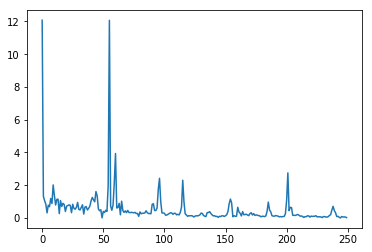

In [21]:
import numpy as np
import matplotlib.pyplot as plt

datafile = './work/housing.data'
data = np.fromfile(datafile, sep=' ')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])

ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]

maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), training_data.sum(axis=0)


for i in range(feature_num):
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])


def load_data():
    # 从文件导入数据
    datafile = './work/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
                     'MEDV']
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), training_data.sum(axis=0) / \
                               training_data.shape[0]

    # 对数据进行归一化处理
    for i in range(feature_num):
        # print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data, minimums[13], maximums[13]


class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        self.w1 = np.random.randn(num_of_weights, num_of_weights)
        self.b1 = 0.
        self.w2 = np.random.randn(num_of_weights, 1)
        self.b2 = 0.

    def forward(self, x):
        z1 = np.dot(x, self.w1) + self.b1
        z1relu = np.maximum(z1, 0)
        z = np.dot(z1relu, self.w2) + self.b2
        return z, z1relu, z1

    def loss(self, z, y):

        error = z - y

        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost

    def gradient(self, x, y):
        z, z1relu, z1 = self.forward(x)
        N = x.shape[0]
        gradient_w2 = 1. / N * np.sum((z - y) * z1relu, axis=0)
        gradient_w2 = gradient_w2[:, np.newaxis]
        gradient_b2 = 1. / N * np.sum(z - y)
        gradient_w1 = 1. / N * np.sum((z - y) * z1relu * x, axis=0)
        gradient_w1 = gradient_w1[:, np.newaxis]
        gradient_b1 = 1. / N * np.sum((z - y) * (y - z1relu))

        return gradient_w1, gradient_b1, gradient_w2, gradient_b2

    def update(self, gradient_w1, gradient_b1, gradient_w2, gradient_b2, eta=0.01):
        self.w1 = self.w1 - eta * gradient_w1
        self.b1 = self.b1 - eta * gradient_b1
        self.w2 = self.w2 - eta * gradient_w2
        self.b2 = self.b2 - eta * gradient_b2

    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k + batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                # print(self.w.shape)
                # print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a, a1, a2 = self.forward(x)
                loss = self.loss(a, y)
                gradient_w1, gradient_b1, gradient_w2, gradient_b2 = self.gradient(x, y)
                self.update(gradient_w1, gradient_b1, gradient_w2, gradient_b2, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                      format(epoch_id, iter_id, loss))

        return losses


# 获取数据
train_data, test_data, min, max = load_data()

# 创建网络
net = Network(13)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()


x = test_data[-10, -1]
pred, pred1, pred2 = net.forward(test_data[-10, :-1])
repred = (pred * max) - (min * (pred - 1))
retest = (x * max) - (min * (x - 1))
print("取倒数第十行数据测试实际值为", retest, "预测值为", repred)
